# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [88]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

In [89]:
housing_path="/content/gdrive/My Drive/synapse_w2/housing_data.csv"
titanic_path="/content/gdrive/My Drive/synapse_w2/titanic_data.csv"
classifier_path="/content/gdrive/My Drive/synapse_w2/classified_data.txt"

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [90]:
# import numpy, pandas, matplotlib, seaborn
# add code here
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read housing_data.csv using pandas and call head() to show first few records.**

In [91]:
# add code here
data=pd.read_csv(housing_path)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [92]:
# add code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [93]:
# add code here
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [94]:
# add code here
print(sorted(data))

['Address', 'Area Population', 'Avg. Area House Age', 'Avg. Area Income', 'Avg. Area Number of Bedrooms', 'Avg. Area Number of Rooms', 'Price']


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

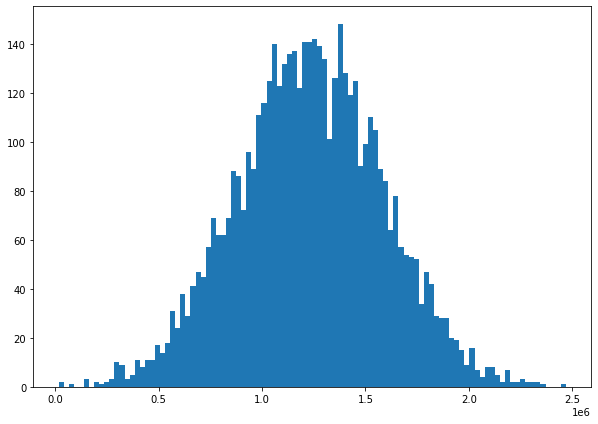

In [95]:
# add code here
x=data["Price"]
n_bins = 100
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(x, bins = n_bins)
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [96]:
# add code here
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [97]:
# add code here
X=pd.DataFrame(data)
X.drop('Price',axis=1,inplace=True)
X.drop('Address',axis=1,inplace=True)
y=data["Price"]

In [98]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape,y.shape)

(5000, 5) (5000,)


In [99]:
# print a few record of X
# add code here
print(X.head(5))

   Avg. Area Income  ...  Area Population
0      79545.458574  ...     23086.800503
1      79248.642455  ...     40173.072174
2      61287.067179  ...     36882.159400
3      63345.240046  ...     34310.242831
4      59982.197226  ...     26354.109472

[5 rows x 5 columns]


In [100]:
# print a few record of y
# add code here
print(y.head(5))

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


### Test-train split

**Import train_test_split function from scikit-learn**

In [101]:
# add code here
import numpy as np
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [102]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [103]:
# add code here
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.size, X_test.size, y_train.size, y_test.size)

(3500, 5) (1500, 5) (3500,) (1500,)
17500 7500 3500 1500


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [104]:
# add code for imports here
from sklearn.linear_model import LinearRegression
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [105]:
# add code here
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [106]:
# add code here
predictions = lm.predict(X_test.values)
print(type(predictions))
print(predictions.size)

<class 'numpy.ndarray'>
1500


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

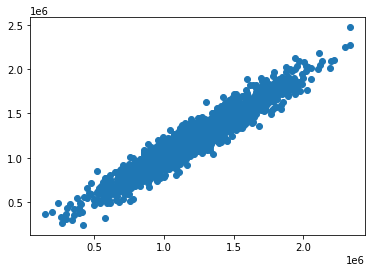

In [107]:
# add code here
plt.scatter(y_test, predictions)

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [108]:
# add code here
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9169456061312828

In [109]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=15, n_jobs=-1)

print('Accuracy: %.3f ' % (mean(scores)))

Accuracy: 0.868 


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [110]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [111]:
# add code here
df=pd.read_csv(classifier_path,index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [112]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [113]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [114]:
# add code here
l=list(df.columns)
print(l)
l.remove('TARGET CLASS')
l

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ', 'TARGET CLASS']


['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

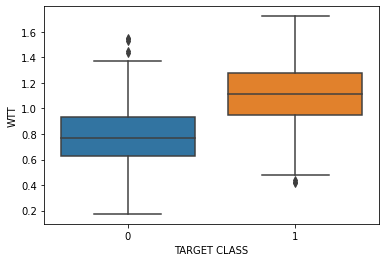

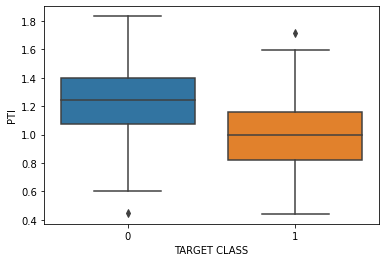

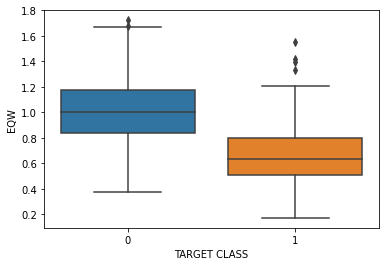

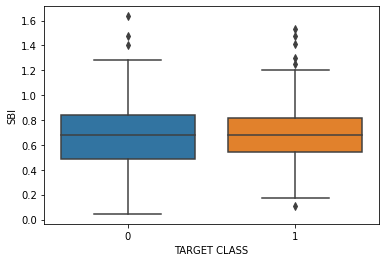

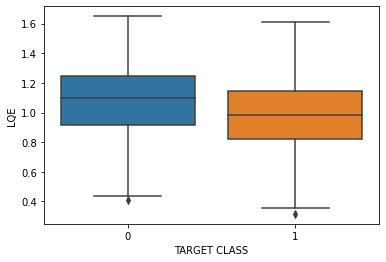

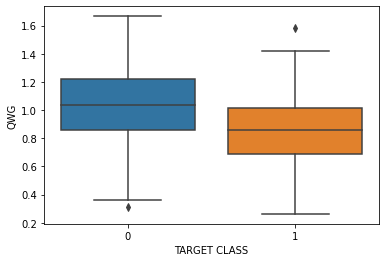

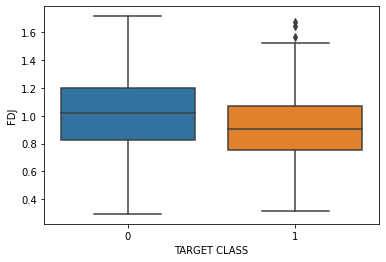

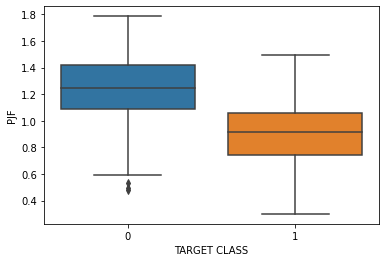

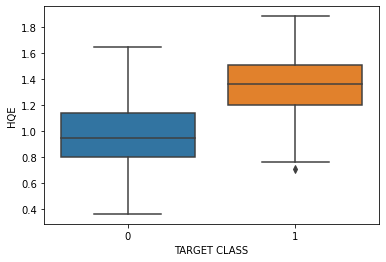

In [115]:
# add code here
for i in range(len(l)-1):
    sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
    plt.show()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [116]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [117]:
# add code here
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_feat=scaler.transform(df.drop('TARGET CLASS',axis=1))

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [118]:
# add code here
df_feat=pd.DataFrame(scaled_feat,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [119]:
# add code here
X=df_feat
y=df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [120]:
# add code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [121]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [122]:
# add code here
pred=knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [123]:
# add code here
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       140
           1       0.94      0.94      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [124]:
# add code here
print(round(knn.score(X_test, y_test),3))

0.937


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [125]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here
acc=[]
for i in range(1,60):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i=model.predict(X_test)
    acc.append(round(np.sum(pred_i==y_test)/len(pred_i),3))

**Plot a graph of K value vs Accuracy**

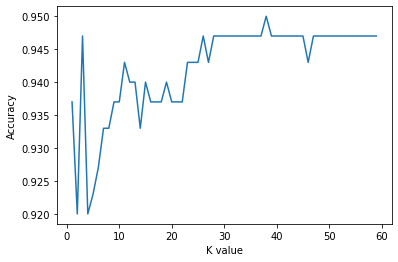

In [126]:
# add code here
plt.plot(range(1,60),acc)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [127]:
# add code here 
best_value=30
acc[best_value-1]

0.947

In [128]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=15, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores),std(scores)))

Accuracy: 0.893 (0.034)


In [129]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [130]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=15, n_jobs=-1)

In [131]:
g_res = gs.fit(X_train, y_train)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    3.0s finished


In [132]:
g_res.best_score_

0.9372494603761948

In [133]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [134]:
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [135]:
from sklearn import metrics
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9442857142857143
Test set accuracy:  0.94


In [136]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[133   7]
 [ 11 149]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       140
           1       0.96      0.93      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [138]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =15)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9300768882858435


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [139]:
#write code here
frame=pd.read_csv(titanic_path)
from sklearn.tree import DecisionTreeClassifier
frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [140]:
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
  pass #remove this line after writing the code
def normalize(data_list):
   X_new = []
   X_max = max(data_list)
   X_min = min(data_list)
   for i in data_list:
     X_new.append( (i - X_min)/(X_max - X_min) )
   return X_new


def preprocessing_t1(train_df):
    train_df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
    
    df_nan = pd.DataFrame()
    
    nan_dict = {}
    for i in train_df.columns:
      nan_dict[i] = (train_df[i].isnull().sum()/len(train_df))*100
    
    df_nan["Column"] = nan_dict.keys()
    df_nan["nan_percentage"] = nan_dict.values()
    
    train_df.drop(["Cabin"], axis=1, inplace=True)
    
    train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
    train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
    train_df["Family_members"] = train_df["SibSp"] + train_df["Parch"]
    train_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
    
    train_df["Age"] = normalize(train_df["Age"])
    train_df["Fare"] = normalize(train_df["Fare"])
    train_df["Family_members"] = normalize(train_df["Family_members"]) 
    
    df_ohe = pd.get_dummies(train_df, columns=["Pclass", "Sex", "Embarked"])
    return df_ohe

frame=preprocessing_t1(frame)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [141]:
#write code here
y=frame['Survived'].values

<b>remove the y_label (survived) from the dataframe</b>

In [142]:
#write code here
frame.drop("Survived", inplace=True, axis=1)
X = frame
X

,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,1
1,0.472229,0.139136,0.1,1,0,0,1,0,1,0,0
2,0.321438,0.015469,0.0,0,0,1,1,0,0,0,1
3,0.434531,0.103644,0.1,1,0,0,1,0,0,0,1
4,0.434531,0.015713,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,0,1,0,0,1,0,0,1
887,0.233476,0.058556,0.0,1,0,0,1,0,0,0,1
888,0.367921,0.045771,0.3,0,0,1,1,0,0,0,1
889,0.321438,0.058556,0.0,1,0,0,0,1,1,0,0


<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [143]:
#write code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

<b>print the test accuracy and train accuracy here</b>

In [144]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores),std(scores)))

Accuracy: 0.892 (0.028)


In [145]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,15,25],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00930114, 0.00670967, 0.00903711, 0.00843787, 0.00923085,
        0.0117919 ]),
 'mean_score_time': array([0.00255284, 0.00182314, 0.00228362, 0.00158691, 0.00228128,
        0.00165014]),
 'mean_test_score': array([0.79296774, 0.79296774, 0.81058065, 0.79296774, 0.80575484,
        0.79296774]),
 'param_C': masked_array(data=[1, 1, 15, 15, 25, 25],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 15, 'kernel': 'rbf'},
  {'C': 15, 'kernel': 'linear'},
  {'C': 25, 'kernel': 'rbf'},
  {'C': 25, 'kernel': 'linear'}],
 'rank_test_score': array([3, 3, 1, 3, 2, 3], dtype=int32),
 'split0_test_score': array([0.816, 0.816, 0.

In [146]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009301,0.000609,0.002553,0.000079,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.816,0.744,0.80,0.782258,0.822581,0.792968,0.028176,3
1,0.006710,0.002086,0.001823,0.000275,1,linear,"{'C': 1, 'kernel': 'linear'}",0.816,0.744,0.80,0.782258,0.822581,0.792968,0.028176,3
2,0.009037,0.000367,0.002284,0.000058,15,rbf,"{'C': 15, 'kernel': 'rbf'}",0.816,0.784,0.84,0.782258,0.830645,0.810581,0.023690,1
3,0.008438,0.003253,0.001587,0.000086,15,linear,"{'C': 15, 'kernel': 'linear'}",0.816,0.744,0.80,0.782258,0.822581,0.792968,0.028176,3
4,0.009231,0.000562,0.002281,0.000132,25,rbf,"{'C': 25, 'kernel': 'rbf'}",0.808,0.784,0.84,0.782258,0.814516,0.805755,0.021354,2
5,0.011792,0.004030,0.001650,0.000048,25,linear,"{'C': 25, 'kernel': 'linear'}",0.816,0.744,0.80,0.782258,0.822581,0.792968,0.028176,3


In [147]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.792968
1,1,linear,0.792968
2,15,rbf,0.810581
3,15,linear,0.792968
4,25,rbf,0.805755
5,25,linear,0.792968


In [148]:
clf.best_params_

{'C': 15, 'kernel': 'rbf'}

In [149]:
clf.best_score_

0.8105806451612902